In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'whitegrid', color_codes = True)
import warnings
warnings.simplefilter(action = 'ignore')

### Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
cols = ['userId','productId','ratings','timestamp']
raw_df = pd.read_csv('D:\Joydeep\AI-ML\GL\Week 8 - Recommender Systems\Assignment/ratings_Electronics.csv', names = cols)
raw_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
raw_df.shape

(7824482, 4)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
raw_df['timestamp'] = pd.to_datetime(raw_df['timestamp'], unit = 's')

In [6]:
raw_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   productId  object        
 2   ratings    float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.8+ MB


In [8]:
raw_df.isnull().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [9]:
print('Unique users : {}, Unique products : {}'.format(raw_df['userId'].nunique(),raw_df['productId'].nunique()))

Unique users : 4201696, Unique products : 476002


In [10]:
raw_df.groupby('ratings').size().reset_index(name = 'Counts')

,ratings,Counts
0,1.0,901765
1,2.0,456322
2,3.0,633073
3,4.0,1485781
4,5.0,4347541


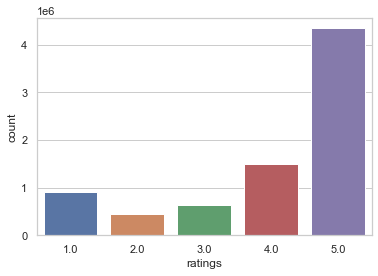

In [11]:
sns.countplot(x = 'ratings', data = raw_df)

In [12]:
cols = ['userId','productId','ratings']
raw_df[cols].duplicated().sum()

0

Max ratings by a single user : 520
Mean ratings by a single user : 3.9101632419209333


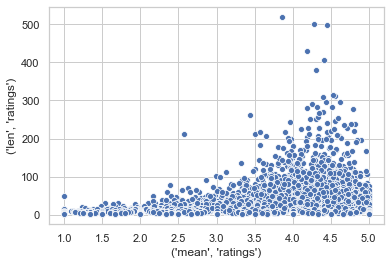

In [13]:
raw_df['ratings'] = raw_df['ratings'].astype(int)

utable = pd.pivot_table(raw_df, index = 'userId', values = 'ratings', aggfunc = ['mean',len])
sns.scatterplot(x = ('mean', 'ratings'), y = ( 'len', 'ratings'), data = utable)
print('Max ratings by a single user : {}'.format(utable[( 'len', 'ratings')].max()))
print('Mean ratings by a single user : {}'.format(utable[( 'mean', 'ratings')].mean()))

Max ratings on a single Product : 18244
Mean ratings on a single Product : 3.889700263013443


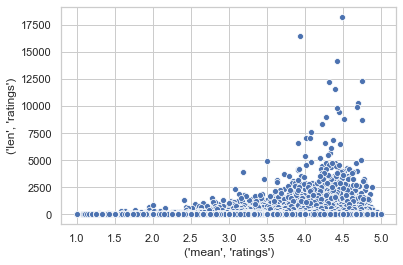

In [14]:
ptable = pd.pivot_table(raw_df, index = 'productId', values = 'ratings', aggfunc = ['mean',len])
sns.scatterplot(x = ('mean', 'ratings'), y = ( 'len', 'ratings'), data = ptable)
print('Max ratings on a single Product : {}'.format(ptable[( 'len', 'ratings')].max()))
print('Mean ratings on a single Product : {}'.format(ptable[( 'mean', 'ratings')].mean()))

### Inferences

1. There are no null values, duplicate values
2. Ratings are 1,2,3,4,5 & Most ratings are 5
3. On average a single customer rates 3.9 products & a product gets 3.88 rating
4. Concentration of users & products are around its mean -> long tail dataset

### Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [118]:
# Taking products with >= 50 ratings & customers who have given >= 50 ratings

print('Number of users with >= 50 ratings : {}'.format(utable[utable[( 'len', 'ratings')] >= 50].shape[0]))
print('Number of products with >= 50 ratings : {}'.format(ptable[ptable[( 'len', 'ratings')] >= 50].shape[0]))      

Number of users with >= 50 ratings : 1540
Number of products with >= 50 ratings : 26226


In [16]:
sub_df = pd.merge(raw_df,utable[utable[( 'len', 'ratings')] >= 50],on = ['userId'], how = 'inner')
sub_df = pd.merge(sub_df,ptable[ptable[( 'len', 'ratings')] >= 50],on = ['productId'], how = 'inner')
sub_df.shape

(79182, 8)

In [17]:
sub_df.head()

,userId,productId,ratings,timestamp,"('mean', 'ratings')_x","('len', 'ratings')_x","(mean_y, ratings)","(len_y, ratings)"
0,A3BY5KCNQZXV5U,B000063574,5,2002-03-21,4.160000,50,4.152893,242
1,A231WM2Z2JL0U3,B000063574,5,2002-11-13,4.309524,252,4.152893,242
2,A15J71JLC29KPW,B000063574,5,2002-03-03,4.164179,67,4.152893,242
3,A3BY5KCNQZXV5U,B0007Y794O,5,2013-05-30,4.160000,50,4.535857,502
4,AKT8TGIT6VVZ5,B0007Y794O,5,2006-05-11,4.833333,192,4.535857,502


### Build Popularity Recommender model.

In [75]:
pdf = sub_df[['productId',('mean_y', 'ratings'),('len_y', 'ratings')]]
pdf.rename(columns = {('mean_y', 'ratings'):'Mean_Ratings',('len_y', 'ratings'):'Count_Ratings'}, inplace = True)
pdf['Mean_Ratings'] = pdf['Mean_Ratings'].round(decimals = 2)
pdf.drop_duplicates(subset = 'productId', keep = False, inplace = True)
pdf = pdf.sort_values(["Mean_Ratings", "Count_Ratings"], ascending = (False, False))
pdf.set_index(['productId'], inplace = True)
pdf.head()

,Mean_Ratings,Count_Ratings
productId,,
B004I763AW,4.97,60
B0043ZLFXE,4.96,90
B0000DYV9H,4.95,76
B008VGCT9K,4.94,230
B00FX9WJNO,4.92,145


#### These 5 products would be recommended to all users through the popularity based model

In [19]:
mod_df = sub_df[['userId','productId','ratings']].copy()
mod_df.head()

,userId,productId,ratings
0,A3BY5KCNQZXV5U,B000063574,5
1,A231WM2Z2JL0U3,B000063574,5
2,A15J71JLC29KPW,B000063574,5
3,A3BY5KCNQZXV5U,B0007Y794O,5
4,AKT8TGIT6VVZ5,B0007Y794O,5


In [20]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79182 entries, 0 to 79181
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     79182 non-null  object
 1   productId  79182 non-null  object
 2   ratings    79182 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 2.1+ MB


In [23]:
from surprise import SVD, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale = (1,5))

sdf = Dataset.load_from_df(mod_df,reader)

### Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio)

In [24]:
train, test = train_test_split(sdf, test_size = 0.3, random_state = 2)

### Build Collaborative Filtering model.

In [25]:
svd = SVD()

svd.fit(train)

In [26]:
kwm_p = KNNWithMeans(k = 50, sim_options={'name':'pearson_baseline', 'user_base':True})

kwm_p.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [27]:
kwm_c = KNNWithMeans(k = 50, sim_options={'name':'cosine', 'user_base':True})

kwm_c.fit(train)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [39]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [38]:
adf = pd.DataFrame(columns = ['SVD','KNNWM_P','KNNWM_C'], index = ['RMSE','MAE','Precision','Recall'])
adf.loc['RMSE',:] = [round(accuracy.rmse(svd.test(test), verbose = False),3),round(accuracy.rmse(kwm_p.test(test), verbose = False),3),round(accuracy.rmse(kwm_c.test(test), verbose = False),3)]
adf.loc['MAE',:] = [round(accuracy.mae(svd.test(test), verbose = False),3),round(accuracy.mae(kwm_p.test(test), verbose = False),3),round(accuracy.mae(kwm_c.test(test), verbose = False),3)]

spred = svd.test(test)
precisions, recalls = precision_recall_at_k(spred, k=5, threshold=4)
adf.loc['Precision','SVD'] = round(sum(prec for prec in precisions.values()) / len(precisions),3) 
adf.loc['Recall','SVD'] = round(sum(rec for rec in recalls.values()) / len(recalls),3)

spred = kwm_p.test(test)
precisions, recalls = precision_recall_at_k(spred, k=5, threshold=4)
adf.loc['Precision','KNNWM_P'] = round(sum(prec for prec in precisions.values()) / len(precisions),3) 
adf.loc['Recall','KNNWM_P'] = round(sum(rec for rec in recalls.values()) / len(recalls),3)

spred = kwm_c.test(test)
precisions, recalls = precision_recall_at_k(spred, k=5, threshold=4)
adf.loc['Precision','KNNWM_C'] = round(sum(prec for prec in precisions.values()) / len(precisions),3) 
adf.loc['Recall','KNNWM_C'] = round(sum(rec for rec in recalls.values()) / len(recalls),3)

adf

,SVD,KNNWM_P,KNNWM_C
RMSE,0.964,1.04,1.05
MAE,0.705,0.749,0.739
Precision,0.849,0.832,0.86
Recall,0.388,0.376,0.398


#### Considering SVD as it has the best scores

### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [29]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
            top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [30]:
fullset = sdf.build_full_trainset()

In [31]:
predset = fullset.build_anti_testset()

In [32]:
pred = svd.test(predset)

In [33]:
rdf = pd.DataFrame(columns = ['userId','product_1','product_2','product_3','product_4','product_5'])
i = 0

top_5 = get_top_n(pred,5)

for uid, user_ratings in top_5.items():
    rdf.loc[i,'userId'] = uid
    j = [iid for (iid, _) in user_ratings]
    rdf.loc[i,'product_1'] = j[0]
    rdf.loc[i,'product_2'] = j[1]
    rdf.loc[i,'product_3'] = j[2]
    rdf.loc[i,'product_4'] = j[3]
    rdf.loc[i,'product_5'] = j[4]
    i += 1

rdf.set_index('userId', inplace = True)
rdf.head()

,product_1,product_2,product_3,product_4,product_5
userId,,,,,
A3BY5KCNQZXV5U,B00BQ4F9ZA,B0000BZL1P,B00005LEN4,B0052SCU8U,B00081A2KY
A231WM2Z2JL0U3,B0000BZL1P,B002TMRZOQ,B000N99BBC,B002V8C3W2,B000F7QRTG
A15J71JLC29KPW,B001MSU1FS,B00007GQLS,B00IVFDZBC,B001OC6DCW,B0019EHU8G
AKT8TGIT6VVZ5,B000QUUFRW,B002K450QI,B003VAHYNC,B003XM1WE0,B0071BTJPI
A1ILWPH1GHUXE2,B002TMRZOQ,B00BQ4F9ZA,B000FQ2JLW,B00D5Q75RC,B00429N18S


### Summarise your insights.

#### Coverage & Personalization are checked to assess the model

In [77]:
unique_list = [] 
      
for uid, user_ratings in top_5.items():
    j = [iid for (iid, _) in user_ratings]
    for x in j:
        if x not in unique_list:
            unique_list.append(x) 

#print(f'Number of unique products recommended in Top 5: {len(unique_list)}, Coverage : {len(unique_list)/mod_df['productId'].nunique()}')
print('Number of unique products recommended in Top 5 across users: {}, Coverage : {}'.format(len(unique_list),round(len(unique_list)/pdf.shape[0],3)))  

Number of unique products recommended in Top 5 across users: 489, Coverage : 0.084


In [114]:
sim_df = pd.DataFrame(columns = ['uid','iid','rating'])
i = 0

for uid, user_ratings in top_5.items():
    j = [iid for (iid, _) in user_ratings]
    k = [est for (_, est) in user_ratings]
    for x in np.arange(0,5):
        sim_df.loc[i,'uid'] = uid
        sim_df.loc[i,'iid'] = j[x]
        sim_df.loc[i,'rating'] = k[x]
        i += 1                      

In [117]:
from surprise import KNNBasic 

algo = KNNBasic(sim_options={'name':'cosine', 'user_base':True})
reader = Reader()
xdf = Dataset.load_from_df(sim_df,reader)
xdf = xdf.build_full_trainset()
algo.fit(xdf)

print('Similarity between recommendations amongst users: {}'.format(round(algo.sim.mean(),2)))  

Computing the cosine similarity matrix...
Done computing similarity matrix.
Similarity between recommendations amongst users: 0.34
